# Customer verification with voice

Voice authentication, or voice biometrics, is one of the advanced ways of authentication used today. It is also considered one of the most secure means of identifying an individual.
Traditional authentication methods, such as passwords or PINs, are susceptible to security risks like identity theft.
Voice authentication has emerged as a promising solution to mitigate these risks by adding additional layers of protection.

Here are some of the advantages of using this technology:
Enhanced security and fraud prevention
One of the key advantages of voice authentication is its enhanced security and fraud prevention capabilities.
Get the complete toolkit, free
Learn more
Unlike PINs, which can be easily forgotten, stolen, or shared, a person’s voice is a distinct and difficult-to-replicate feature. This technology significantly reduces the risk of unauthorized access and fraud.
A good example is in HSBC UK, where telephone fraud was reduced by 50% upon voice authentication.

Seamless user experience
Through voice authentication, users can authenticate themselves simply by speaking, making it intuitive and convenient.
Customers can securely access their banking information by speaking a passphrase rather than recalling a series of digits or answering security questions.

Accessibility and inclusivity
Voice authentication provides a more accessible and inclusive authentication solution than traditional methods.
It enables individuals with disabilities to authenticate easily and effectively without relying on complex interfaces or physical actions.
For instance, visually impaired individuals can independently access their smartphones, make payments, or interact with various devices through voice commands.
Voice recognition systems, like biometric voice recognition system, play a pivotal role in making digital platforms more accessible to individuals with different abilities.

Disadvantages of voice authentication
Despite its many advantages, voice authentication also comes with significant disadvantages:
Voice authentication also has faults and challenges that businesses should be aware of. Here are some of them:
Limitations in noisy environments
One of the challenges of voice authentication is its sensitivity to background noise.
In noisy environments, such as crowded areas or places with poor acoustics, the accuracy of voice analysis may be compromised. This leads to potential false rejections or acceptances.
Vulnerability to voice replication techniques
While voice biometrics are difficult to replicate, techniques like deepfake voice technology can imitate someone’s voice accurately.
One drawback is the risk of voice sample being compromised or recorded without permission, raising privacy and security concerns.
These methods pose a significant threat to voice authentication systems, especially with the rise of AI tools.
It requires continuous advancements in voice analysis technology to counteract them effectively.
Lack of standards and interoperability
The lack of standardized protocols and widespread interoperability pose a challenge to adopting voice authentication across various platforms and devices.
Organizations must ensure compatibility and integration with different systems, limiting their universal implementation.
Ethical and privacy concerns
Voice authentication collects and stores individuals’ biometric data, raising ethical and privacy concerns.
Organizations must adhere to strict privacy regulations and secure storage practices to prevent unauthorized access or misuse of sensitive voice data.
Transparency and clear user consent mechanisms are essential to address these concerns effectively.
Potential errors in voice recognition
Despite voice analysis algorithm advancements, voice recognition errors can still occur.
Another challenge is the accuracy of speech recognition tech, with tone variations, background noise, or a cold impacting system’s user ID.
Factors like changes in voice due to colds or other health conditions, emotional stress, or aging can impact the accuracy of voice authentication systems.
Continuous improvements and refinements are necessary to minimize the occurrence of false rejections or acceptances.

https://www.computerweekly.com/news/252500302/HSBC-blocks-249m-in-UK-fraud-with-voice-biometrics

HSBC said that telephone banking fraud has been reduced by 50% since the introduction of a biometric security system that authenticates customers through their voices.



text dependent and text independant 

https://www.pingidentity.com/en/resources/blog/post/introducing-voice-verification.html

In [38]:
#Standard Python Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Model Creation/Evaluation Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

#Audio Data Manipulation Imports
import random
import IPython.display as ipd

#File Path Navigation Import
import os

#Model Saving Import
import pickle

import os
import torch
import torchaudio
import torchaudio.transforms as T
import torch.nn.functional as F


# Data

In [2]:
def list_files_with_subfolders(base_path):
    files_list = []
    for root, dirs, files in os.walk(base_path):
        for file_name in files:
            subfolder_name = os.path.relpath(root, base_path)
            files_list.append({'Folder': subfolder_name, 'File': file_name})
    return files_list

In [3]:
base_directory = 'data_raw'

In [4]:
files_list = list_files_with_subfolders(base_directory)
files_df = pd.DataFrame(files_list)

In [5]:
files_df.value_counts('Folder')

Folder
zero                  4052
five                  4052
yes                   4044
seven                 3998
no                    3941
nine                  3934
down                  3917
one                   3890
go                    3880
two                   3880
stop                  3872
six                   3860
on                    3845
left                  3801
eight                 3787
right                 3778
off                   3745
four                  3728
three                 3727
up                    3723
dog                   2128
wow                   2123
house                 2113
marvin                2100
bird                  2064
happy                 2054
cat                   2031
sheila                2022
bed                   2014
tree                  1759
backward              1664
visual                1592
follow                1579
learn                 1575
forward               1557
_background_noise_       7
.                    

In [6]:
files_df

,Folder,File
0,.,.DS_Store
1,.,validation_list.txt
2,.,LICENSE
3,.,README.md
4,.,testing_list.txt
...,...,...
105836,four,25e95412_nohash_1.wav
105837,four,92521ccc_nohash_0.wav
105838,four,29dce108_nohash_0.wav
105839,four,c6389ab0_nohash_0.wav


In [7]:
files_df = files_df[files_df['Folder'] != '.']

In [8]:
files_df

,Folder,File
5,right,8e523821_nohash_2.wav
6,right,bb05582b_nohash_3.wav
7,right,988e2f9a_nohash_0.wav
8,right,a69b9b3e_nohash_0.wav
9,right,1eddce1d_nohash_3.wav
...,...,...
105836,four,25e95412_nohash_1.wav
105837,four,92521ccc_nohash_0.wav
105838,four,29dce108_nohash_0.wav
105839,four,c6389ab0_nohash_0.wav


In [9]:
files_df['UserID'] = files_df['File'].apply(lambda x: x.split('_')[0])

<ipython-input-9-4ee925372c93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  files_df['UserID'] = files_df['File'].apply(lambda x: x.split('_')[0])


In [10]:
files_df

,Folder,File,UserID
5,right,8e523821_nohash_2.wav,8e523821
6,right,bb05582b_nohash_3.wav,bb05582b
7,right,988e2f9a_nohash_0.wav,988e2f9a
8,right,a69b9b3e_nohash_0.wav,a69b9b3e
9,right,1eddce1d_nohash_3.wav,1eddce1d
...,...,...,...
105836,four,25e95412_nohash_1.wav,25e95412
105837,four,92521ccc_nohash_0.wav,92521ccc
105838,four,29dce108_nohash_0.wav,29dce108
105839,four,c6389ab0_nohash_0.wav,c6389ab0


In [11]:
files_df.value_counts('UserID')

UserID
c50f55b8    316
893705bb    263
cce7416f    250
2aca1e72    236
ddedba85    226
           ... 
6c2dd2d5      1
090efdc4      1
66f07c09      1
65303f47      1
white         1
Length: 2625, dtype: int64

In [12]:
user_file_counts = files_df['UserID'].value_counts().reset_index()
user_file_counts.columns = ['UserID', 'FileCount']
user_file_counts

,UserID,FileCount
0,c50f55b8,316
1,893705bb,263
2,cce7416f,250
3,2aca1e72,236
4,ddedba85,226
...,...,...
2620,5b7cb31f,1
2621,d4b14f03,1
2622,73f0659a,1
2623,3fd21070,1


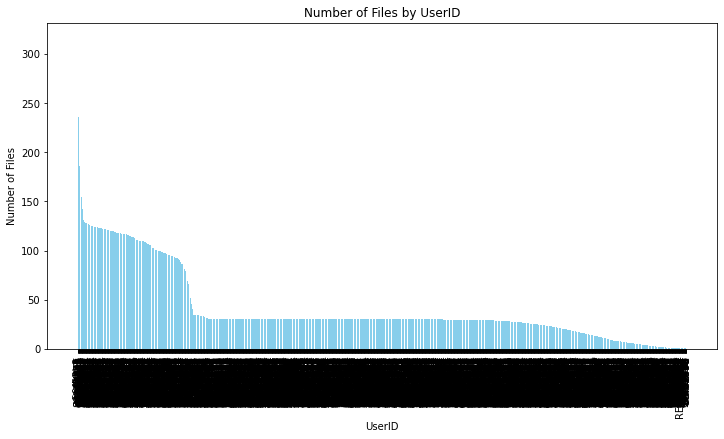

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(user_file_counts['UserID'], user_file_counts['FileCount'], color='skyblue')
plt.xlabel('UserID')
plt.ylabel('Number of Files')
plt.title('Number of Files by UserID')
plt.xticks(rotation=90)
plt.show()

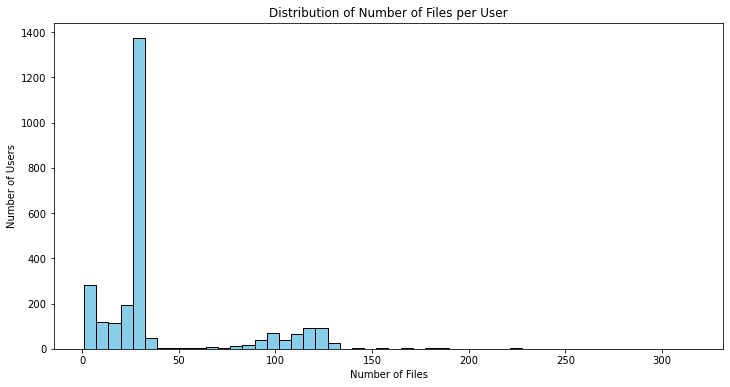

In [14]:
plt.figure(figsize=(12, 6))
plt.hist(user_file_counts['FileCount'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of Files')
plt.ylabel('Number of Users')
plt.title('Distribution of Number of Files per User')
plt.show()

In [15]:
folder_counts = files_df['Folder'].value_counts().reset_index()
folder_counts.columns = ['Folder', 'FolderCount']
folder_counts

,Folder,FolderCount
0,zero,4052
1,five,4052
2,yes,4044
3,seven,3998
4,no,3941
5,nine,3934
6,down,3917
7,one,3890
8,two,3880
9,go,3880


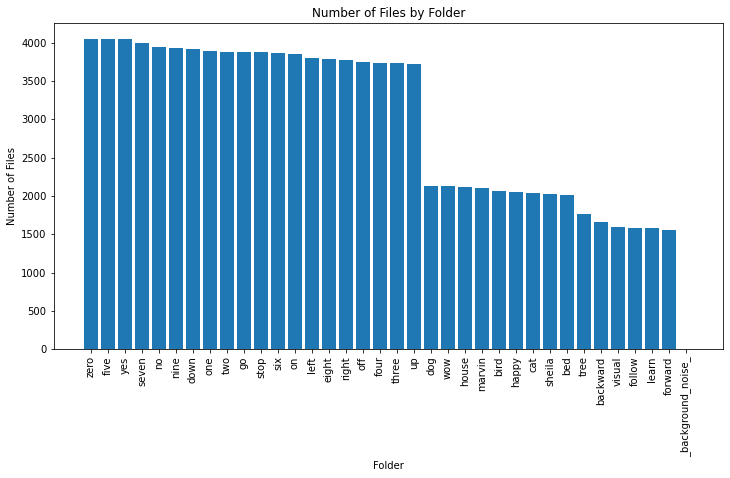

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(folder_counts['Folder'], folder_counts['FolderCount'])
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.title('Number of Files by Folder')
plt.xticks(rotation=90)
plt.show()

# Lets take a look at a wav file

In [17]:
import torchaudio
import torchaudio.transforms as T

# Load the .wav file
waveform, original_sample_rate = torchaudio.load('data_numbers_wav/one/0a2b400e_nohash_0.wav')

# Resample to 8000 Hz
resampler = T.Resample(orig_freq=original_sample_rate, new_freq=8000)
waveform_resampled = resampler(waveform)

In [18]:
print(waveform_resampled.shape)
print(original_sample_rate)
print(8000) 

torch.Size([1, 8000])
16000
8000


In [19]:
mel_spectrogram_transform = T.MelSpectrogram(sample_rate=8000, n_mels=128)
mel_spectrogram = mel_spectrogram_transform(waveform_resampled)

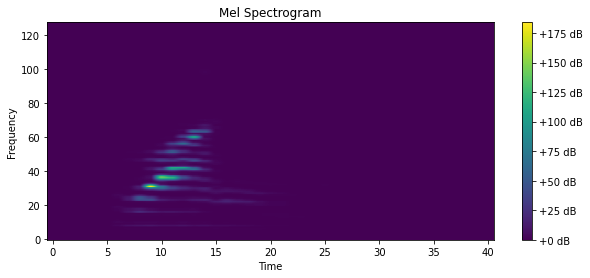

In [20]:
mel_spectrogram_np = mel_spectrogram.squeeze().numpy()

# Plot the Mel spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_np, aspect='auto', origin='lower')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

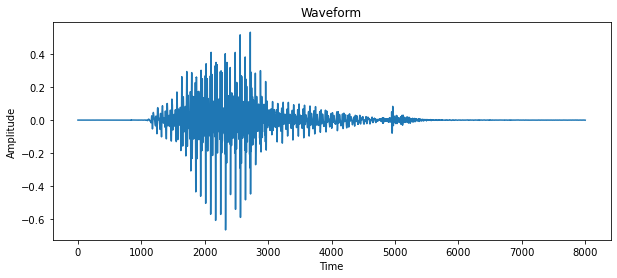

In [21]:
waveform_np = waveform_resampled.squeeze().numpy()

# Plot the waveform using waveshow
plt.figure(figsize=(10, 4))
plt.plot(waveform_np)
plt.title('Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

# Creating subset for modeling

In [57]:
def process_audio_folder(folder_path, label, target_sr=8000):
    
    # Initialize lists to store audio samples and labels
    audio_samples = []
    labels = []

    # Loop through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            # Load the audio file using torchaudio
            file_path = os.path.join(folder_path, filename)
            
            waveform, original_sample_rate = torchaudio.load(file_path) #loads audio data in waveform and sample rate
            resampler = T.Resample(orig_freq=original_sample_rate, new_freq=target_sr) #used to convert all sample rates from orig to 8000
            waveform_resampled = resampler(waveform) #standardize all to 8000 

            # Ensure waveform is exactly 8000 samples long
            if waveform_resampled.shape[1] > 8000:
                waveform_resampled = waveform_resampled[:, :8000] #change to 8000 again if not
            elif waveform_resampled.shape[1] < 8000:
                padding_size = 8000 - waveform_resampled.shape[1]
                waveform_resampled = F.pad(waveform_resampled, (0, padding_size)) #if its shorter it fills with 0 to reach 8000

            
            # Add the tensor to the list of samples
            audio_samples.append(waveform_resampled)
            
            # Add the corresponding label
            # Convert the label to a one-hot encoded tensor
            probabilities = [0.0 for i in range(10)]
            probabilities[label] = 1.0
            label_tensor = torch.tensor(probabilities, dtype=torch.float32)  # Ensure correct tensor creation
            
            # Add the one-hot encoded label tensor to the list
            labels.append(label_tensor)

    # Stack the samples and labels into tensors
    audio_samples_tensor = torch.stack(audio_samples) # Shape: (n_samples, n_mel_bins, n_time_steps)
    labels_tensor = torch.stack(labels) # Shape: (n_samples,)
    
    return audio_samples_tensor, labels_tensor

In [52]:
"""
# Convert to Mel spectrogram
mel_spectrogram_transform = T.MelSpectrogram(sample_rate=target_sr)
mel_spectrogram = mel_spectrogram_transform(waveform_resampled)
            
# Convert the Mel spectrogram to a tensor
mel_tensor = mel_spectrogram.squeeze(0)  # Remove channel dimension if present
            
"""

'\n# Convert to Mel spectrogram\nmel_spectrogram_transform = T.MelSpectrogram(sample_rate=target_sr)\nmel_spectrogram = mel_spectrogram_transform(waveform_resampled)\n            \n# Convert the Mel spectrogram to a tensor\nmel_tensor = mel_spectrogram.squeeze(0)  # Remove channel dimension if present\n            \n'

In [58]:
folder_path_one = 'data_raw/one'
audio_samples_tensor_one, labels_tensor_one = process_audio_folder(folder_path_one, label=1)

In [61]:
folder_path_one = 'data_raw/one'
audio_samples_tensor_one, labels_tensor_one = process_audio_folder(folder_path_one, label=1)

folder_path_two = 'data_raw/two'
audio_samples_tensor_two, labels_tensor_two = process_audio_folder(folder_path_two, label=2)

folder_path_three = 'data_raw/three'
audio_samples_tensor_three, labels_tensor_three = process_audio_folder(folder_path_three, label=3)

folder_path_four = 'data_raw/four'
audio_samples_tensor_four, labels_tensor_four = process_audio_folder(folder_path_four, label=4)

folder_path_five = 'data_raw/five'
audio_samples_tensor_five, labels_tensor_five = process_audio_folder(folder_path_five, label=5)

folder_path_six = 'data_raw/six'
audio_samples_tensor_six, labels_tensor_six = process_audio_folder(folder_path_six, label=6)

folder_path_seven = 'data_raw/seven'
audio_samples_tensor_seven, labels_tensor_seven = process_audio_folder(folder_path_seven, label=7)

folder_path_eight = 'data_raw/eight'
audio_samples_tensor_eight, labels_tensor_eight = process_audio_folder(folder_path_eight, label=8)

folder_path_nine = 'data_raw/nine'
audio_samples_tensor_nine, labels_tensor_nine = process_audio_folder(folder_path_nine, label=9)

folder_path_zero = 'data_raw/zero'
audio_samples_tensor_zero, labels_tensor_zero = process_audio_folder(folder_path_zero, label=0)

In [62]:
print(audio_samples_tensor_one.shape, labels_tensor_one.shape)
print(audio_samples_tensor_two.shape, labels_tensor_two.shape)
print(audio_samples_tensor_three.shape, labels_tensor_three.shape)
print(audio_samples_tensor_four.shape, labels_tensor_four.shape)
print(audio_samples_tensor_five.shape, labels_tensor_five.shape)
print(audio_samples_tensor_six.shape, labels_tensor_six.shape)
print(audio_samples_tensor_seven.shape, labels_tensor_seven.shape)
print(audio_samples_tensor_eight.shape, labels_tensor_eight.shape)
print(audio_samples_tensor_nine.shape, labels_tensor_nine.shape)
print(audio_samples_tensor_zero.shape, labels_tensor_zero.shape)

torch.Size([3890, 1, 8000]) torch.Size([3890, 10])
torch.Size([3880, 1, 8000]) torch.Size([3880, 10])
torch.Size([3727, 1, 8000]) torch.Size([3727, 10])
torch.Size([3728, 1, 8000]) torch.Size([3728, 10])
torch.Size([4052, 1, 8000]) torch.Size([4052, 10])
torch.Size([3860, 1, 8000]) torch.Size([3860, 10])
torch.Size([3998, 1, 8000]) torch.Size([3998, 10])
torch.Size([3787, 1, 8000]) torch.Size([3787, 10])
torch.Size([3934, 1, 8000]) torch.Size([3934, 10])
torch.Size([4052, 1, 8000]) torch.Size([4052, 10])


In [64]:
labels_tensor_one

tensor([[0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.]])